# How to Make Classifications using Decision Trees

### A Team Project to:
* Discover how to use Machine Learning software to build Decision Trees 
* Experiment with the effects of changinging parameters(hyper parameters) for Machine Learning
* Evaluate the quality of automatically generated decision trees    





In [183]:
#@title # Assigning Roles and Responsibilities within each group

#@markdown ---
#@markdown ### Enter Instructor Name:
Instructor_Name = "Denny" #@param {type:"string"}
#@markdown 1. Introduces activities. Assigns roles to participants.
#@markdown 2. Responds for help or clarification request.
#@markdown 3. Collects the Jupiter notebooks from Recorder and Evaluator
#@markdown ---

#@markdown ### Enter Facilitator Name:
Facilitator_Name = "Joshua" #@param {type:"string"} 
#@markdown 1.	Reads aloud each question and ask for volunteers to answer. If there is no volunteer then he/she starts the discussion and asks one participant after another for comments, solutions, answers, or clarifications.  When majority participants agree then she/he asks Recorder to record the answer. Also coordinates discussion about the code execution and the output like any other question.   
#@markdown 2.	Involves each participant equally in the discussions.    
#@markdown 3.	Turn the coordinating role to Evaluator after finishing each activity.   
#@markdown 4.	Coordinates Zoom screen access. Displays his/her screen when asking questions. Gives access to screen sharing as requested    
#@markdown ---

#@markdown ### Enter Recorder Name:
Recorder_Name = "Grace" #@param {type:"string"} 
#@markdown 1.	Records all answers  for each question  inside the Jupiter Notebook   
#@markdown 2. Use "Run al" in menu "Runtime" and then "Save" Jupiter Workbook with all answers and results.
#@markdown 3. Submit Jupiter notebook with all answers and results of the running code.
#@markdown ---

#@markdown ### Enter Evaluator Name:
Evaluator_Name = "Raymond" #@param {type:"string"} 
  
#@markdown 1.	Keeps track of time for each designated Activity.   
#@markdown 2.	After each activity leads the discussion about material and collects feedback in the form of the table below.   
#@markdown 3. Submit Jupiter notebook with all comments and results of discussion at the end of each activity.  
#@markdown ---

#@markdown ### Enter Participant names
Participant_4_Name = "Catherine" #@param {type:"string"} 
Participant_5_Name = "" #@param {type:"string"}
Participant_6_Name = "" #@param {type:"string"}
Participant_7_Name = "" #@param {type:"string"}
Participant_8_Name = "Valentin" #@param {type:"string"}

#@markdown 1.	Participates actively in team work to answer all questions.
#@markdown 2.	Executes the code and shares the comments.
#@markdown ---


Mount your Google Drive by running the code below:

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
#@title Library Imports
import pandas as pd  #imports the "pandas" library
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score
import numpy as np
from IPython.display import SVG, display
from graphviz import Source
from ipywidgets import interactive, fixed
from sklearn.metrics import confusion_matrix

from sklearn import tree

In [186]:
#@title Helper Functions
def getColumnIndex(table, col):
    headers = table.columns.values.tolist()
    index = headers.index(col)
    return(index)

def calculateConfusionMatrix(table, col1, col2, pos_value=1, neg_value=0, true_pos_value=1, true_neg_value=0):
    #Note: col2 MUST be the true values, or this will be backwards.
    truePositive= 0
    trueNegative = 0
    falsePositive = 0
    falseNegative = 0
    col1_index = getColumnIndex(table, col1)
    col2_index = getColumnIndex(table, col2)
    for i in range(len(table)):
        if table.iloc[i,col1_index] == pos_value and table.iloc[i,col2_index] == true_pos_value:
            truePositive += 1
        elif table.iloc[i,col1_index] == pos_value and table.iloc[i,col2_index] == true_neg_value:
            falsePositive += 1
        elif table.iloc[i,col1_index] == neg_value and table.iloc[i,col2_index] == true_pos_value:
            falseNegative += 1
        elif table.iloc[i,col1_index] == neg_value and table.iloc[i,col2_index] == true_neg_value:
            trueNegative += 1             
    return(truePositive, falsePositive, trueNegative, falseNegative)

def calculateImpurity2(table, col1, col2, pos_value=1, neg_value=0, true_pos_value=1, true_neg_value=0):
    # NOTE. Col2 must be the ground truth or this will be backwards
    
    truePositive, falsePositive, trueNegative, falseNegative = calculateConfusionMatrix(table, col1, col2, pos_value, neg_value, true_pos_value, true_neg_value)
    total = truePositive + trueNegative + falsePositive + falseNegative

    if (truePositive + falsePositive) > 0:
        impurityLeft = 1 - pow(truePositive/(truePositive + falsePositive),2) - pow(falsePositive/(truePositive + falsePositive),2)
    else:
        impurityLeft = 0
    if (trueNegative + falseNegative) > 0:   
        impurityRight = 1 - pow(falseNegative/(falseNegative + trueNegative),2) - pow(trueNegative/(falseNegative + trueNegative),2) 
    else:
        impurityRight = 0
    
    if total > 0:
        impurity = impurityLeft*((truePositive+falsePositive)/total) + impurityRight*((trueNegative+falseNegative)/total)
    else:
        print("you messed up somewhere")
        return()
    print ("impurityLeft:  ",impurityLeft)
    print ("impurityRight:  ",impurityRight)
    print ("total :  ", impurity)
    return (impurity)

def calculateImpurity(table, col1, col2, pos_value=1, neg_value=0, true_pos_value=1, true_neg_value=0):
    # NOTE. Col2 must be the ground truth or this will be backwards
    
    truePositive, falsePositive, trueNegative, falseNegative = calculateConfusionMatrix(table, col1, col2, pos_value, neg_value, true_pos_value, true_neg_value)
    total = truePositive + trueNegative + falsePositive + falseNegative

    if (truePositive + falsePositive) > 0:
        impurityLeft = 1 - pow(truePositive/(truePositive + falsePositive),2) - pow(falsePositive/(truePositive + falsePositive),2)
    else:
        impurityLeft = 0
    if (trueNegative + falseNegative) > 0:   
        impurityRight = 1 - pow(falseNegative/(falseNegative + trueNegative),2) - pow(trueNegative/(falseNegative + trueNegative),2) 
    else:
        impurityRight = 0
    
    if total > 0:
        impurityBefore = 1 - pow((truePositive+falsePositive)/total,2) - pow((trueNegative+falseNegative)/total,2)
        impurityAfter = impurityLeft*((truePositive+falsePositive)/total) + impurityRight*((trueNegative+falseNegative)/total)
    else:
        return()
#    print ("impurity Initial:  {:.3f}".format(impurityBefore))
    print ("impurity Local:  {:.3f}".format(impurityLeft))
    print ("impurity Visitor:  {:.3f}".format(impurityRight))
#    print ("impurity Total :  {:.3f}".format( impurityAfter))
    return (impurityRight, impurityLeft, impurityAfter)



def decisionTreeForPredictor(table_train, col, label_col):
    # load dataset
    indexList = []
    index = getColumnIndex(table_train, col)
    indexList.append(index)
    # feature matrix
    X_train = table_train.iloc[:,[index]]

    labelIndex = getColumnIndex(table_train, label_col)
    # target vector
    y_train = table_train.iloc[:,labelIndex]

    # feature labels
    labels = table_train.columns[indexList].values.tolist()

    estimator = plot_tree_graphviz_no_test(X_train, y_train, labels, split="best", depth=4, min_split=0.1, min_leaf=0.2)


def selectRowsCondition(table, columnName, operator, value):
    
    operatorList = ['>', '<', '='] 
    if operator not in operatorList:
        print("Please use one of the following operators. ['>', '<', '='] ")
        newTable = table

    else:
        if operator == '>':
            condition = (table[columnName] > value)
        elif operator == '<':
            condition = (table[columnName] < value)
        else:
            condition = (table[columnName] == value)
        newTable = table[condition]

        if newTable.empty:
            print("you dont need go any further")
    return (newTable)

def plot_tree_graphviz(xtrain, xtest, ytrain, ytest, labels, split, depth, min_split, min_leaf=0.2):

    estimator = DecisionTreeClassifier(random_state = 0, 
          criterion = "gini",
          splitter = split,
          max_depth = depth,
          min_samples_split=min_split,
          min_samples_leaf=min_leaf)
    estimator.fit(xtrain, ytrain)
    
    predictions = estimator.predict(xtest)
    score = accuracy_score(ytest, predictions)
    
    print('Accuracy score: {}'.format(score))
    
    graph = Source(tree.export_graphviz(estimator,
      out_file=None,
      feature_names=labels,
      class_names=['Visitor', 'Local'],
      filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

def plot_tree_graphviz_no_test(xtrain, ytrain, labels, split, depth, min_split, min_leaf=0.2):

    estimator = DecisionTreeClassifier(random_state = 0, 
          criterion = "gini",
          splitter = split,
          max_depth = depth,
          min_samples_split=min_split,
          min_samples_leaf=min_leaf)
    estimator.fit(xtrain, ytrain)
            
    graph = Source(tree.export_graphviz(estimator,
      out_file=None,
      feature_names=labels,
      class_names=['Visitor', 'Local'],
      filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

def plot_tree_graphviz_selectColumns(train, test, cols, split, depth, min_split, min_leaf=0.2):
  
  indexList = []
  for element in cols:
    index = getColumnIndex(train, element)
    indexList.append(index)

  xtrain = train.iloc[:,indexList]
  xtest = test.iloc[:, indexList]
  ytrain = train.iloc[:,3]
  ytest = test.iloc[:,3]

  labels = train.columns[indexList].values.tolist()

  estimator = DecisionTreeClassifier(random_state = 0, 
        criterion = "gini",
        splitter = split,
        max_depth = depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf)
  estimator.fit(xtrain, ytrain)
  
  predictions = estimator.predict(xtest)
  score = accuracy_score(ytest, predictions)
  
  print('Accuracy score: {}'.format(score))
  
  graph = Source(tree.export_graphviz(estimator,
    out_file=None,
    feature_names=labels,
    class_names=['Visitor', 'Local'],
    filled = True))
  display(SVG(graph.pipe(format='svg')))
  return estimator


# Activity 1. Decisions based on Decision Trees

## Activity 1 Practical Problem:

You are a new city employee who needs to  differentiate between local and visiting vehicles  based on information about  the frequent stops,  left turns, and slow speed of each vehicle.  The previous employee, a human expert in this area, created the decision tree diagram.  Your manager has given you a  sample data set in a tabular form as the file "vehicles_sample.csv" to compare the real type of vehicle with the class predicted by the diagram.

# Fig 1

Consider the following diagram in Fig. 1, and answer questions 1-13:

![decision tree fig 1](https://drive.google.com/uc?export=view&id=1DCNZkb8c7e_NMBAmXjaUrJSns33F5iVH)




In [187]:
#@title Activity 1 Questions part 1
#@markdown 1. The diagram is a decision tree (it is actually an upside-down tree). All boxes are referred to as nodes. How many nodes do we have in this diagram?
activity1_answer1 = "" #@param {type:"string"}
#@markdown 2. We refer to the single node on the top of the diagram as root. Decision trees are usually multi-level. We start counting from the top of diagram but do not include root. How many levels of decision tree do we have?
activity1_answer2 = "" #@param {type:"string"}
#@markdown 3. The nodes can be connected to other nodes on a lower level. How many such nodes are in this diagram?
activity1_answer3 = "" #@param {type:"string"}
#@markdown 4. The connections are called branches of the tree.  How many branches are in this diagram?
activity1_answer4 = "" #@param {type:"string"}
#@markdown 5. Nodes that grow two branches ("Yes" and "No") are called decision boxes. They represent a selection condition of the vehicles. What is the selection condition for the decision box in the root?
activity1_answer5 = "" #@param {type:"string"}
#@markdown 6. We refer to selection condition also as "predictor" since we use them for predictions.  How many predictors do we use in this diagram?
activity1_answer6 = "" #@param {type:"string"}
#@markdown 7. The nodes that do not grow any branches are called "leaves" and represent classes of vehicles. How many leaves do we have in the diagram?
activity1_answer7 = "" #@param {type:"string"}
#@markdown 8. Is the number of leaves in the decision tree the same as number of classes? Why?
activity1_answer8 = "" #@param {type:"string"}
#@markdown 9. Our decision process always starts from the root level. What predictor do we use first in our decision process?
activity1_answer9 = "" #@param {type:"string"}
#@markdown 10. Is it possible to make a decision about the class of the vehicle if we know only that the vehicle made less than 3 stops? If yes what would be the class name?
activity1_answer10 = "" #@param {type:"string"}
#@markdown 11. Is it possible to make a decision about the class of the vehicle if we know only that the vehicle made 3 or more stops?
activity1_answer11 = "" #@param {type:"string"}
#@markdown 12. Is it possible to make a decision about the class of the vehicle when all three predictors of the vehicle have the value of "No"? If yes what would be the class name? 
activity1_answer12 = "" #@param {type:"string"}
#@markdown 13. Do we always need to check three predictors to determine the class of the vehicle?
activity1_answer13 = "" #@param {type:"string"}
#@markdown 14.  There is a  sample data in a tabular form as the file "vehicles_logical_sample.csv". Run the code below to see the sample of data. 

In [188]:
#@title #Code for Activity 1, Question 14

Vehicles_Logical_Sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Decision Trees/vehicles_logical_sample.csv")
display(Vehicles_Logical_Sample)

,Stops < 3,Left turns < 2,Speed < 20,Vehicle
0,Yes,Yes,No,Local
1,Yes,No,Yes,Local
2,No,Yes,Yes,Local
3,No,No,No,Visitor
4,No,No,Yes,Visitor


In [189]:
#@title Activity 1 Questions part 2
#@markdown 15.	The vehicles are numbered starting from 0 through 4. How many vehicles are in the data sample?
activity1_answer15 = "" #@param {type:"string"}
#@markdown 16. The actual (real) class name is provided for each vehicle in the "Vehicle"  column. Why this column is also called "the label"?
activity1_answer16 = "" #@param {type:"string"}
#@markdown 17. Is the prediction of the decision tree the same as label for vehicle number 0?
activity1_answer17 = "" #@param {type:"string"}
#@markdown 18.	Let us consider the vehicle number 3. Is the prediction of the decision tree the same as label?
activity1_answer18 = "" #@param {type:"string"}
#@markdown 19.	Are there any other vehicles  classified incorrectly by the decision tree in Fig. 1?
activity1_answer19 = "" #@param {type:"string"}
#@markdown 20.  In the next section we will discover how to build the decision tree based on scientific approach. Can we always create a perfect decision tree i.e. the decision tree that would correctly classify all of the vehicles? Why?
activity1_answer20 = "" #@param {type:"string"}

In [190]:
#@title #Team Work Evaluation for Activity 1
#@markdown 1.	How much time was required for completion of Activity 1?
activity1_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity1_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How many participants thought the problems were too simple (trivial)? 
activity1_evaluation3 = "" #@param {type:"string"}
#@markdown 4.	How many participants thought the problems were at the proper level of difficulty?	
activity1_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were too hard?
activity1_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	Was help needed. Where?
activity1_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	How could the team work and learn more effectively?
activity1_evaluation7 = "" #@param {type:"string"} 

# Activity 2. Choosing Predictors for Decision Trees




## Activity 2 Practical Problem:
You, a city employee, would like to use a scientific method to evaluate predictors to see if we can use them to construct a better decision tree.



1. Let us analyze each predictor separately and discover how well it predicts. First let us consider the “Frequent stops” predictor. Run the code below to see only the relevant part of the sample of data. 

In [191]:
#@title #Code for Activity 2, Question 1
Vehicles_Logical_Sample[['Stops < 3', 'Vehicle']]

,Stops < 3,Vehicle
0,Yes,Local
1,Yes,Local
2,No,Local
3,No,Visitor
4,No,Visitor


In [192]:
#@title # Activity 2 Questions part 1
#@markdown 2.	How many vehicles made less than 3 stops?
activity2_answer2 = "" #@param {type:"string"} 
#@markdown 3.	How many vehicles made 3 or more stops?
activity2_answer3 = "" #@param {type:"string"} 

## Fig 2
# New Section
Consider the following diagram in Fig. 2, and answer questions 4-40:

![decision tree fig 2](https://drive.google.com/uc?export=view&id=1hNQPJDeqmZ_RSdnKlGv99e7LHVC5axCS)



In [193]:
#@title # Activity 2 Questions part 2
#@markdown 4. Let us build a decision tree consisting of  only one predictor "Stops < 3"  as shown in Fig.2.  We added the line "samples" in Fig.2 to indicate how many vehicles are considered in each node. In the root we have 5 vehicles to split between two branches based on the prediction. What are the values of the line "samples" in the leaf nodes?
activity2_answer4 = "" #@param {type:"string"} 
#@markdown 5.	Would we correctly predict the vehicle class if we have only information about vehicles frequent stops? How many times would the prediction be correct?
activity2_answer5 = "" #@param {type:"string"} 
#@markdown 6. How many times would the prediction be incorrect?
activity2_answer6 = "" #@param {type:"string"} 
#@markdown 7.	As we discovered, we would have correct and incorrect predictions when using the single predictor "Stops < 3". Let us look only at vehicles that have “Yes” value for this feature. How many times would the prediction be correct? 
activity2_answer7 = "" #@param {type:"string"} 
#@markdown 8. When the prediction matches the true value, we call this subset “true positives”. The subset when the prediction incorrectly makes a positive prediction is called “false positives”. How many  “false positives” do we have? 
activity2_answer8 = "" #@param {type:"string"} 
#@markdown 9. We can use the decision tree diagrams to record the subset sizes in Fig.2. The numbers in the line "value" of the "Visitor" node describe  “true positives” and “false positives”. Are these numbers the same as your answer?
activity2_answer9 = "" #@param {type:"string"} 
#@markdown 10. Let us look only at vehicles that have “No” value for this feature. How many times would the prediction be correct? 
activity2_answer10 = "" #@param {type:"string"} 
#@markdown 11.	We call this vehicle subset “true negatives”. The prediction can be also incorrect. This subset is called “false negatives”. How many  “false negatives” do we have? 
activity2_answer11 = "" #@param {type:"string"} 
#@markdown 12. Similarly we can record “true negatives” and “false negatives” subset sizes as shown in the node Local in Fig.3. Are they the same as your answers?
activity2_answer12 = "" #@param {type:"string"} 
#@markdown 13. When the single predictor has larger subsets of "true positive" and  "true negative" then the prediction is better or worse? Choose the best answer.
activity2_answer13 = "Better" #@param ["Better", "Worse"]
#@markdown 14. For larger data sets we use computing functions to get these numbers. Run the code below

In [194]:
#@title Code for Activity 2 part 2, Question 14
true_positive, false_positive, true_negative, false_negative = calculateConfusionMatrix(Vehicles_Logical_Sample, 
                                                'Stops < 3', 'Vehicle', 'Yes', 'No', 'Local', 'Visitor')
print( "Metrics for Stops < 3")
print ('True positives: {}'.format(true_positive))
print ('False positives: {}'.format(false_positive))
print ('True negatives: {}'.format(true_negative))
print ('False negatives: {}'.format(false_negative))

Metrics for Stops < 3
True positives: 2
False positives: 0
True negatives: 2
False negatives: 1


In [195]:
#@title # Activity 2 Questions part 3
#@markdown 15. Are the computed values the same as in Fig.2? If different, ask the instructor for help.
activity2_answer15 = "" #@param {type:"string"} 
#@markdown 16. We are using sample of data to "learn" the best decision tree. When we want to apply the decision tree to to different data sample we can only refer to probabilities of belonging to these subsets. In our  case expected probability of being "true positive" in the left node will be 2/3 = 0.66. What is the probability of being "false positive" in the left node ?
activity2_answer16 = "" #@param {type:"string"} 
#@markdown 17. What is the probability of being "true negative" in the right node ?
activity2_answer17 = "" #@param {type:"string"} 
#@markdown 18. What is the probability of being "false negative" in the right node "?
activity2_answer18 = "" #@param {type:"string"} 
#@markdown 19. Having higher the probabilities of "true positive" and "true negative" allows the decision tree to make a better classification.   The mathematical function that captures this is gini impurity formula.  It  subtructs from 1 the sum of squares of all probabilities. In our case for the left node (Local class)  is 1 - (0.75^2 + 0.25^2) = 0.444. Compute the value of gini impurity for right node (Value class)  
activity2_answer19 = "" #@param {type:"string"} 
#@markdown 20. Gini impurity can be between 0 and 1. The "Visitor" node contains vehicles perfectly classified. What is the meaning of 0 for gini impurity?
activity2_answer20 = "" #@param {type:"string"} 
#@markdown 21. For larger data sets we use computing functions to get the gini impurity. Run the code below

In [196]:
#@title Code for Activity 2 part3, Question 21
print ("gini impurity for Stops < 3" )
giniImpurity = calculateImpurity(Vehicles_Logical_Sample, 'Stops < 3', 'Vehicle', "Yes", "No", 'Visitor', 'Local')

gini impurity for Stops < 3
impurity Local:  0.000
impurity Visitor:  0.444


In [197]:
#@title # Activity 2 Questions part 4
#@markdown 22. Did you get the same values of all gini impurities? 
activity2_answer22 = "" #@param {type:"string"} 
#@markdown 23.  We can use use a machine learning algorithm to create a decision tree diagram for the "Stops < 3" predictor and show gini impurity. In order to do this, we need to convert all "Yes" and "No" into binary 1 and 0. Run the code below to see the initial and converted table.

In [198]:
#@title Code for Activity 2 part 4, Question 23

Vehicles_Binary_Sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Decision Trees/vehicles_binary_sample.csv")

display(Vehicles_Logical_Sample[['Stops < 3', 'Vehicle']])
display(Vehicles_Binary_Sample[['Stops', 'Vehicle']])

,Stops < 3,Vehicle
0,Yes,Local
1,Yes,Local
2,No,Local
3,No,Visitor
4,No,Visitor


,Stops,Vehicle
0,1,Local
1,1,Local
2,0,Local
3,0,Visitor
4,0,Visitor


In [199]:
#@title # Activity 2 Questions part 5
#@markdown 25.  Based on the data above above, would we correctly predict the vehicle class if we have only information about vehicles 'Stops < 3' ? 
activity2_answer25 = "" #@param {type:"string"}
#@markdown 26.  How many times would  the prediction be correct?   
activity2_answer26 = "" #@param {type:"string"} 
#@markdown 27.	How many times would the prediction be  incorrect?
activity2_answer27 = "" #@param {type:"string"} 
#@markdown 28. Compute gini impurities for this predictor with two nodes. 
activity2_answer28 = "" #@param {type:"string"} 
#@markdown 29. Let us generate decision tree using machine learning code  for the single predictor 'Stops < 3'. Run the code below to see the gini impurities for this predictor.

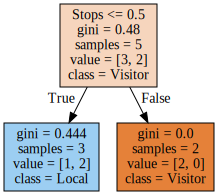

In [200]:
#@title Code for Activity 2 part 5, Question 29
col_name = 'Stops'
label_name = 'Vehicle'
table = Vehicles_Binary_Sample
decisionTreeForPredictor(table_train=table, col=col_name, label_col=label_name)

In [201]:
#@title # Activity 2 Questions part 6
#@markdown 30. Looking at the generated diagram above you can see all important numbers included i.e. gini impurities. Did you get the same gini numbers before? 
activity2_answer30 = "" #@param {type:"string"}
#@markdown 31. The are also small differences in formating the generated diagram in comparison to our Fig. 2. The order of numbers representing the sizes of vehicles subsets might be reversed depending on the parent node. However, the more significant problem with automatically generated diagram is that it does not show the total gini impurity. The total gini impurity is important since it captures overall "value" of the predictor. It can be computed by the weighted average of impurities of each branch node. Run the code below.

In [202]:
#@title Code for Activity 2 part 6, Question 31
pos_value = 1
neg_value = 0
true_pos_value = 'Local'
true_neg_value = 'Visitor'
col_name="Stops"
impurityLeft, impurityRight, impurityAfter = calculateImpurity(table, col_name, label_name, pos_value, neg_value, true_pos_value, true_neg_value)
print ("impurity total for the predictor 'Stops < 3': ", impurityAfter  )

impurity Local:  0.000
impurity Visitor:  0.444
impurity total for the predictor 'Stops < 3':  0.26666666666666666


In [203]:
#@title # Activity 2 Questions part 7
#@markdown 32.	Compute the total gini impurity by hand. What value did you get?
activity2_answer32 = "" #@param {type:"string"}
#@markdown 33. Let us evaluate the	"Left turns < 2" predictor. Run the code below.

In [204]:
#@title Code for Activity 2 part 7, Question 33
display(Vehicles_Logical_Sample[['Left turns < 2', 'Vehicle']])
display(Vehicles_Binary_Sample[['Left turns', 'Vehicle']])

,Left turns < 2,Vehicle
0,Yes,Local
1,No,Local
2,Yes,Local
3,No,Visitor
4,No,Visitor


,Left turns,Vehicle
0,1,Local
1,0,Local
2,1,Local
3,0,Visitor
4,0,Visitor


In [205]:
#@title # Activity 2 Questions part 8
#@markdown 34.  Based on the data above above, would we correctly predict the vehicle class if we have only information about vehicles "Left turns < 2 "? How many times would  the prediction be correct?   
activity2_answer34 = "" #@param {type:"string"}
#@markdown 35.	How many times would the prediction be  incorrect?
activity2_answer35 = "" #@param {type:"string"}
#@markdown 36. Compute gini impurities for this predictor with two nodes. 
activity2_answer36 = "" #@param {type:"string"}
#@markdown 37. Let us generate decision tree using machine learning code  for the single predictor 'Left turns <2'. Run the code below to see the gini impurities for this predictor.

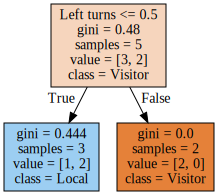

impurity Local:  0.000
impurity Visitor:  0.444
impurity total for the predictor 'Left turns < 2':  0.26666666666666666


In [206]:
#@title Code for Activity 2 part 8, Question 37
col_name = 'Left turns'
label_name = 'Vehicle'
table = Vehicles_Binary_Sample
decisionTreeForPredictor(table_train=table, col=col_name, label_col=label_name)

pos_value = 1
neg_value = 0
true_pos_value = 'Local'
true_neg_value = 'Visitor'
col_name = 'Left turns'
impurityLeft, impurityRight, impurityAfter = calculateImpurity(table, col_name, label_name, pos_value, neg_value, true_pos_value, true_neg_value)
print ("impurity total for the predictor 'Left turns < 2': ", impurityAfter  )

In [207]:
#@markdown 38. Let us evaluate the	"Speed < 20" predictor. Run the code below.

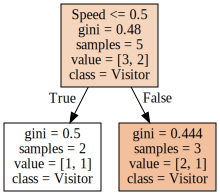

impurity Local:  0.444
impurity Visitor:  0.500
impurity total for the predictor 'Speed < 20':  0.4666666666666667


In [208]:
#@title Code for Activity 2 part 8, Question 38
col_name = 'Speed'
label_name = 'Vehicle'
table = Vehicles_Binary_Sample
decisionTreeForPredictor(table_train=table, col=col_name, label_col=label_name)

pos_value = 1
neg_value = 0
true_pos_value = 'Local'
true_neg_value = 'Visitor'
col_name = "Speed"
impurityLeft, impurityRight, impurityAfter = calculateImpurity(table, col_name, label_name, pos_value, neg_value, true_pos_value, true_neg_value)
print ("impurity total for the predictor 'Speed < 20': ", impurityAfter  )

In [209]:
#@title # Activity 2 Questions part 9
#@markdown 39. Did you get the same gini impurity as show in the plot above?
activity2_answer39 = "" #@param {type:"string"}
#@markdown 40.	What predictor is the best according to gini formula?
activity2_answer40 = "" #@param {type:"string"}

In [210]:
#@title #Team Work Evaluation for Activity 2
#@markdown 1.	How much time was required for completion of Activity 2?
activity2_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity2_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How many participants thought the problems were too simple (trivial)? 
activity2_evaluation3 = "" #@param {type:"string"}
#@markdown 4.	How many participants thought the problems were at the proper level of difficulty?	
activity2_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were too hard?
activity2_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	Was help needed. Where?
activity2_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	How could the team work and learn more effectively?
activity2_evaluation7 = "" #@param {type:"string"}

# Activity 3. Building Decision Trees

In [211]:
#@title # Activity 3 Questions part 1
#@markdown 1. Two predictors have the lowest gini impurity. One of them should be chosen and therefore should be used as the root for the decision tree (since the numbers are the same, the choice can be arbitrary). We have chosen "Stops < 3" as the decision box at the root. Once we have created the root node we need to decide what two nodes should be connected to it: a class node  or a decision node. Let us first consider the right branch of the root.  We know that all vehicles in the right subset are perfectly classified. In this case should it be a class node or decision box? Why?
activity3_answer1 = "" #@param {type:"string"}
#@markdown 2. Let us next consider the right branch of the root.   We know that some vehicles will be misclassified if we terminate the tree with the class node. So we need to connect the root to a decision node. How do we choose the predictor? Would it help if we choose "Stops < 3" again"?
activity3_answer2 = "" #@param {type:"string"}
#@markdown 3. Before we decide what predictor to choose let us identify the vehicles that need to be processed in the right subtree. For small samples, this can be done manually, but it will be difficult for larger datasets. To solve that problem, we write code to identify these subsets. Run the code below.

In [212]:
#@title Code for Activity 3 part 1, Question 3
rightSample = selectRowsCondition(Vehicles_Logical_Sample, 'Stops < 3', '=', 'No')
display(rightSample)

rightSample_binary = selectRowsCondition(Vehicles_Binary_Sample, 'Stops', '=', 0)
display(rightSample_binary)

,Stops < 3,Left turns < 2,Speed < 20,Vehicle
2,No,Yes,Yes,Local
3,No,No,No,Visitor
4,No,No,Yes,Visitor


,Stops,Left turns,Speed,Vehicle
2,0,1,1,Local
3,0,0,0,Visitor
4,0,0,1,Visitor


In [213]:
#@title # Activity 3 Questions part 2
#@markdown 4. We now have to recursively apply our "building one node" procedure for the resulting subset. Run the code below to reevaluate usefulness of each remaining predictor. Let us start with "Left turns < 2".

impurity Local:  0.000
impurity Visitor:  0.000
impurity total for the predictor 'Left turns < 2':  0.0


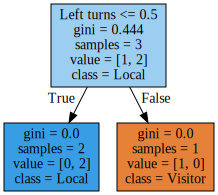

In [214]:
#@title Code for Activity 3 part 2, Question 4
col_name = 'Left turns'
label_name = 'Vehicle'
table = rightSample_binary

pos_value = 1
neg_value = 0
true_pos_value = 'Local'
true_neg_value = 'Visitor'

impurityLeft, impurityRight, impurityAfter = calculateImpurity(table, col_name, label_name, pos_value, neg_value, true_pos_value, true_neg_value)
print ("impurity total for the predictor 'Left turns < 2': ", impurityAfter  )
decisionTreeForPredictor(table_train=table, col=col_name, label_col=label_name)

In [215]:
#@title # Activity 3 Questions part 3
#@markdown 5. Did you get the same numbers using hand computations?
activity3_answer5 = "" #@param {type:"string"}
#@markdown 6. Let us continue with the "Left turns < 2" predictor.Run the code below to reevaluate usefulness of each remaining predictor at this particular part of the tree. 

impurity Local:  0.500
impurity Visitor:  0.000
impurity total for the predictor 'Speed < 20':  0.3333333333333333


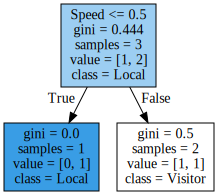

In [216]:
#@title Code for Activity 3 part 3, Question 6
col_name = 'Speed'
label_name = 'Vehicle'
table = rightSample_binary

pos_value = 1
neg_value = 0
true_pos_value = 'Local'
true_neg_value = 'Visitor'

impurityLeft, impurityRight, impurityAfter = calculateImpurity(table, col_name, label_name, pos_value, neg_value, true_pos_value, true_neg_value)
print ("impurity total for the predictor 'Speed < 20': ", impurityAfter  )
decisionTreeForPredictor(table_train=table, col=col_name, label_col=label_name)

In [217]:
#@title # Activity 3 Questions part 4
#@markdown 7. Are these gini impurities the same as according to your hand computation?
activity3_answer7 = "" #@param {type:"string"}
#@markdown 8. Compare the total impurity for both "Left turns" and "Speed < 20". Since "Left turns" predictor has the lower gini impurity, we attach the corresponding decision box as a right node to the root decision box as shown in the plot below. 
activity3_answer8 = "" #@param {type:"string"}
#@markdown 9. There is an important problem related with the question when to terminate the branches. We discovered already that if for any branch the gini impurity is 0 then we can terminate the branch by the appropriate leaf. The gini value should go lower to indicate improvement. Try to recreate the digrams in the interactive program. Run the code below. 

In [218]:
#@title Code for Activity 3 part 4, Question 9

# feature matrix
Vehicles_Binary_Sample_train = Vehicles_Binary_Sample.iloc[:,[0,1,2]]
Vehicles_Binary_Sample_test = Vehicles_Binary_Sample.iloc[:,[0,1,2]]

# target vector
Vehicles_Binary_Sample_train_label = Vehicles_Binary_Sample.iloc[:,3]
Vehicles_Binary_Sample_test_label = Vehicles_Binary_Sample.iloc[:,3]

# feature labels
Vehicles_Binary_Sample_labels = Vehicles_Binary_Sample.columns.values.tolist()[0:3]


inter_vehicles_digital_sample = interactive(plot_tree_graphviz,
   xtrain = fixed(Vehicles_Binary_Sample_train),
   xtest = fixed(Vehicles_Binary_Sample_test),
   ytrain = fixed(Vehicles_Binary_Sample_train_label),
   ytest = fixed(Vehicles_Binary_Sample_test_label),  
   labels = fixed(Vehicles_Binary_Sample_labels), 
   #crit = ["gini", "entropy"],
   split = ["best", "random"],
   depth=[1,2,3,4],
   min_split=(0.1,1),
   min_leaf=(0.1,0.5))

display(inter_vehicles_digital_sample)

interactive(children=(Dropdown(description='split', options=('best', 'random'), value='best'), Dropdown(descri…

In [219]:
#@title # Activity 3 Questions part 5
#@markdown 10. Can you recreate the decision tree for the single predictor 'Stops < 3'? What is the accuracy score?
activity3_answer10 = "" #@param {type:"string"}

#@markdown 11. Can you recreate the decision tree for the single predictor 'Left turns < 2'? What is the accuracy score?
activity3_answer11 = "" #@param {type:"string"}

#@markdown 12. Can you recreate the decision tree for the single predictor 'Speed < 2'? What is the accuracy score?
activity3_answer12 = "" #@param {type:"string"}

#@markdown 13. Is a one level tree (root plus its children) sufficient to accurately predict every vehicle?
activity3_answer13 = "" #@param {type:"string"}

#@markdown 14. Can you recreate the tree with two predictors. What hyper-parameters (menu and sliders) did you use?
activity3_answer14 = "" #@param {type:"string"}

#@markdown 15. Can you create a tree with tree and four levels.  What hyper-parameters (menu and sliders) did you use?
activity3_answer15 = "" #@param {type:"string"}

In [220]:
#@title #Team Work Evaluation for Activity 3
#@markdown 1.	How much time was required for completion of Activity 3?
activity3_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity3_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How many participants thought the problems were too simple (trivial)? 
activity3_evaluation3 = "" #@param {type:"string"}
#@markdown 4.	How many participants thought the problems were at the proper level of difficulty?	
activity3_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were too hard?
activity3_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	Was help needed. Where?
activity3_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	How could the team work and learn more effectively?
activity3_evaluation7 = "" #@param {type:"string"}

# Activity 4. Tuning Decision Trees for large Data Sets

In [221]:
#@title # Activity 4 Questions part 1
#@markdown 1. Let us use two large data sets in files "vehicles_binary_train.csv" and "vehicles_binary_test.csv". We will use the file with the postfix "train" for the algorithm to "learn" how to construct the decision tree, and the file with the postfix "test" to evaluate the performance of the decision tree. Run the code below to see the tree being created in realtime with a larger dataset.

In [222]:
#@title Code for Activity 4 part 1, Question 1

Vehicles_Binary_Train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Decision Trees/vehicles_binary_train.csv')
print("Number of rows in the training set: {}".format(len(Vehicles_Binary_Train)))
Vehicles_Binary_Test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Decision Trees/vehicles_binary_test.csv')
print("Number of rows in the testing set: {}".format(len(Vehicles_Binary_Test)))
print()

Inter_Vehicles_Binary = interactive(plot_tree_graphviz_selectColumns,
   train = fixed(Vehicles_Binary_Train),
   test = fixed(Vehicles_Binary_Test), 
   cols = [['Stops'], ['Left turns'], ['Speed'], ['Stops', 'Left turns'], ['Stops', 'Speed'],['Left turns','Speed'], ['Stops', 'Left turns', 'Speed']],
   #crit = ["gini", "entropy"],
   split = ["best", "random"],
   depth=[1,2,3,4],
   min_split=(0.1,1),
   min_leaf=(0.1,0.5))

display(Inter_Vehicles_Binary)

Number of rows in the training set: 442267
Number of rows in the testing set: 189543



interactive(children=(Dropdown(description='cols', options=(['Stops'], ['Left turns'], ['Speed'], ['Stops', 'L…

In [223]:
#@title # Activity 4 Questions part 2
#@markdown 2. How many rows do we have in the train file?
activity4_answer2 = "" #@param {type:"string"}
#@markdown 3. How many rows do we have in the test file?
activity4_answer3 = "" #@param {type:"string"}
#@markdown 4. Create the decision tree for the single predictor 'Stops'? What is the accuracy score?
activity4_answer4 = "" #@param {type:"string"}
#@markdown 5. Create the decision tree for the single predictor 'Left turns'? What is the accuracy score?
activity4_answer5 = "" #@param {type:"string"}
#@markdown 6. Create the decision tree for the single predictor 'Speed'? What is the accuracy score?
activity4_answer6 = "" #@param {type:"string"}
#@markdown 7. Is a one level tree (root plus its children) sufficient to accurately predict every vehicle?
activity4_answer7 = "" #@param {type:"string"}
#@markdown 8. Create the tree with two predictors "Stops" and "Left turns". Record your accuracy.
activity4_answer8 = "" #@param {type:"string"}
#@markdown 9. Create the tree with two predictors "Stops" and "Left turns". What hyper-parameters (menu and sliders) did you use?
activity4_answer9 = "" #@param {type:"string"}
#@markdown 10. Create the tree with two predictors "Stops" and "Speed". Record your accuracy.
activity4_answer10 = "" #@param {type:"string"}
#@markdown 11. Create the tree with two predictors "Stops" and "Speed". What hyper-parameters (menu and sliders) did you use?
activity4_answer11 = "" #@param {type:"string"}
#@markdown 12. Create the tree with two predictors "Left turns" and "Speed". Record your accuracy.
activity4_answer12 = "" #@param {type:"string"}
#@markdown 13. Create the tree with two predictors "Left turns" and "Speed". What hyper-parameters (menu and sliders) did you use?
activity4_answer13 = "" #@param {type:"string"}
#@markdown 14. Create the tree with three predictors "Stops", "Left turns" and "Speed". Record your accuracy.
activity4_answer14 = "" #@param {type:"string"}
#@markdown 15. Create the tree with three predictors "Stops", "Left turns" and "Speed". What hyper-parameters (menu and sliders) did you use?
activity4_answer15 = "" #@param {type:"string"}
#@markdown 16. Experiment with the interactive plot above to get a three level tree and try get the highest accuracy. Record your accuracy here.
activity4_answer16 = "" #@param {type:"string"}
#@markdown 17. Experiment with the interactive plot above to get a four level tree and try get the highest accuracy. Record your accuracy here.
activity4_answer17 = "" #@param {type:"string"}
#@markdown 18. Compare the accuracies of all the trees above. Do they have the same accuracy?  If not, which tree gave the best accuracy?
activity4_answer18 = "" #@param {type:"string"}
#@markdown 19. What were the hyperparameters of the best tree?
activity4_answer19 = "" #@param {type:"string"}

In [224]:
#@title #Team Work Evaluation for Activity 4
#@markdown 1.	How much time was required for completion of Activity 4?
activity4_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity4_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How many participants thought the problems were too simple (trivial)? 
activity4_evaluation3 = "" #@param {type:"string"}
#@markdown 4.	How many participants thought the problems were at the proper level of difficulty?	
activity4_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were too hard?
activity4_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	Was help needed. Where?
activity4_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	How could the team work and learn more effectively?
activity4_evaluation7 = "" #@param {type:"string"}

# Activity 5. Tuning Decision Trees for Large Data Sets with Numeric Features

## Practical Problem Part 3:

#### Now you need to use the large data set with numerical data and to tune the parameters for the best predictors generation usingmachine learning

In [225]:
#@title # Activity 5 Questions part 1
#@markdown 1. In this activity, we will use two files that will have numeric values for our features. This will allow the machine learning algorithm to "learn" the best predictors. Run the code below.

In [226]:
#@title Code for Activity 5 part 1, Question 1
Vehicles_Digital_Train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Decision Trees/vehicles_digital_train.csv')
print("Number of rows in the testing set: {}".format(len(Vehicles_Digital_Train)))
Vehicles_Digital_Test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Decision Trees/vehicles_digital_test.csv')
print("Number of rows in the testing set: {}".format(len(Vehicles_Digital_Test)))
print()


Inter_Vehicles_Digital = interactive(plot_tree_graphviz_selectColumns,
   train = fixed(Vehicles_Digital_Train),
   test = fixed(Vehicles_Digital_Test),
   cols = [['Stops'], ['Left turns'], ['Speed'], ['Stops', 'Left turns'], ['Stops', 'Speed'],['Left turns','Speed'], ['Stops', 'Left turns', 'Speed']], 
   #crit = ["gini", "entropy"],
   split = ["best", "random"],
   depth=[1,2,3,4],
   min_split=(0.1,1),
   min_leaf=(0.1,0.5))

display(Inter_Vehicles_Digital)

Number of rows in the testing set: 442267
Number of rows in the testing set: 189543



interactive(children=(Dropdown(description='cols', options=(['Stops'], ['Left turns'], ['Speed'], ['Stops', 'L…

In [227]:
#@title # Activity 5 Questions part 2
#@markdown 2. How many rows do we have in the train file?
activity5_answer2 = "" #@param {type:"string"}
#@markdown 3. How many rows do we have in the test file?
activity5_answer3 = "" #@param {type:"string"}
#@markdown 4. Create the decision tree for the single predictor 'Stops'? What is the accuracy score?
activity5_answer4 = "" #@param {type:"string"}
#@markdown 5. Create the decision tree for the single predictor 'Left turns'? What is the accuracy score?
activity5_answer5 = "" #@param {type:"string"}
#@markdown 6. Create the decision tree for the single predictor 'Speed'? What is the accuracy score?
activity5_answer6 = "" #@param {type:"string"}
#@markdown 7. Is a one level tree (root plus its children) sufficient to accurately predict every vehicle?
activity5_answer7 = "" #@param {type:"string"}
#@markdown 8. Create the tree with two predictors "Stops" and "Left turns". Record your accuracy.
activity5_answer8 = "" #@param {type:"string"}
#@markdown 9. Create the tree with two predictors "Stops" and "Left turns". What hyper-parameters (menu and sliders) did you use?
activity5_answer9 = "" #@param {type:"string"}
#@markdown 10. Create the tree with two predictors "Stops" and "Speed". Record your accuracy.
activity5_answer10 = "" #@param {type:"string"}
#@markdown 11. Create the tree with two predictors "Stops" and "Speed". What hyper-parameters (menu and sliders) did you use?
activity5_answer11 = "" #@param {type:"string"}
#@markdown 12. Create the tree with two predictors "Left turns" and "Speed". Record your accuracy.
activity5_answer12 = "" #@param {type:"string"}
#@markdown 13. Create the tree with two predictors "Left turns" and "Speed". What hyper-parameters (menu and sliders) did you use?
activity5_answer13 = "" #@param {type:"string"}
#@markdown 14. Create the tree with three predictors "Stops", "Left turns" and "Speed". Record your accuracy.
activity5_answer14 = "" #@param {type:"string"}
#@markdown 15. Create the tree with three predictors "Stops", "Left turns" and "Speed". What hyper-parameters (menu and sliders) did you use?
activity5_answer15 = "" #@param {type:"string"}
#@markdown 16. Experiment with the interactive plot above to get a three level tree and try get the highest accuracy. Record your accuracy here.
activity5_answer16 = "" #@param {type:"string"}
#@markdown 17. Experiment with the interactive plot above to get a four level tree and try get the highest accuracy. Record your accuracy here.
activity5_answer17 = "" #@param {type:"string"}
#@markdown 18. Compare the accuracies of all the trees above. Do they have the same accuracy?  If not, which tree gave the best accuracy?
activity5_answer18 = "" #@param {type:"string"}
#@markdown 19. What were the hyperparameters of the best tree?
activity5_answer19 = "" #@param {type:"string"}
#@markdown 20. In the optimal tree, we are using different predictors. These predictors are "Stops", "Left turns" and "Speed", but with different conditions. Previously, the data had been conditioned for you by a human "expert". Which predictor set is better?
activity5_answer19 = "" #@param {type:"string"}

In [228]:
#@title #Team Work Evaluation for Activity 5
#@markdown 1.	How much time was required for completion of Activity 5?
activity5_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity5_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How many participants thought the problems were too simple (trivial)? 
activity5_evaluation3 = "" #@param {type:"string"}
#@markdown 4.	How many participants thought the problems were at the proper level of difficulty?	
activity5_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were too hard?
activity5_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	Was help needed. Where?
activity5_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	How could the team work and learn more effectively?
activity5_evaluation7 = "" #@param {type:"string"}